In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_csv('D:\Global Terrorism - START data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data_tmp = data
data.info()

C:\Users\hio\AppData\Local\Temp\ipykernel_16392\3747775148.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:\Global Terrorism - START data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [4]:
data


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0.0


In [5]:
# Remove all duplicate rows 
data = data.drop_duplicates(keep=False)
data.replace('a', None)
len(data)

169019

In [6]:
data.isnull().sum() # find null data


Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         3885
longitude        3886
AttackType          0
Killed           9099
Wounded         14879
Target            521
Summary         56798
Group               0
Target_type         0
Weapon_type         0
Motive         119356
casualities     15415
dtype: int64

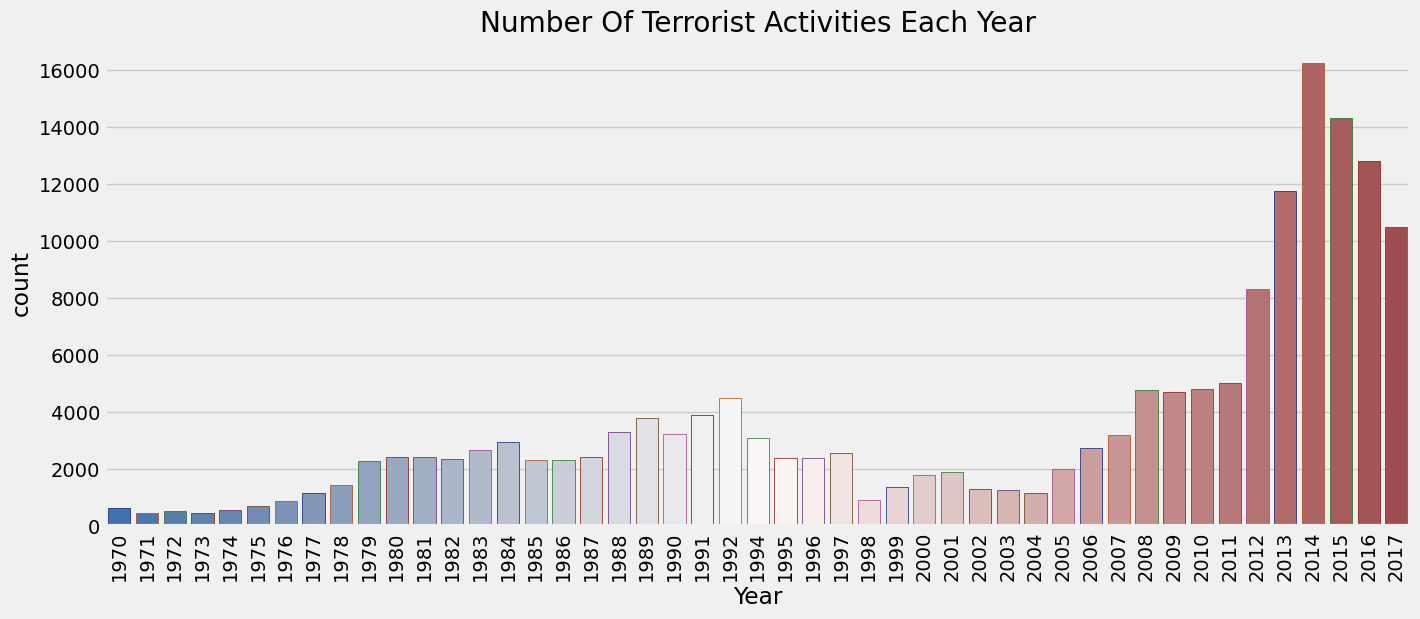

In [7]:
plt.subplots(figsize=(15,6))   #how terrorist activities increased with time
sns.countplot(x='Year', data=data, palette='vlag', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

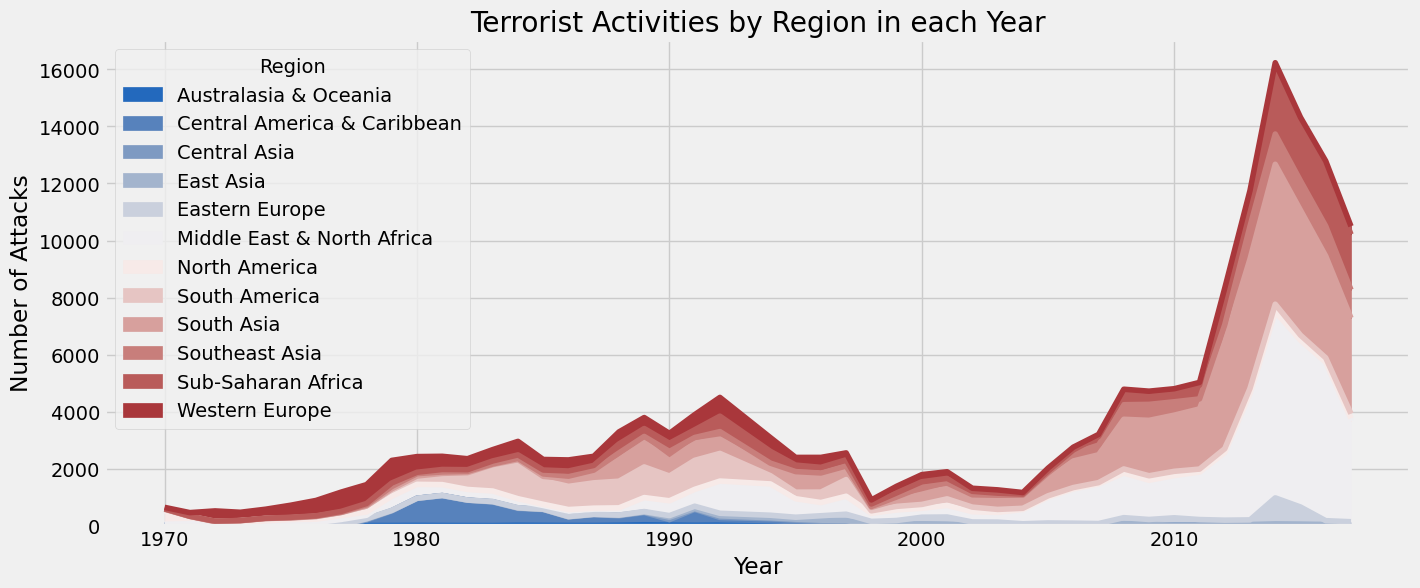

In [8]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6),colormap="vlag")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show() #region wise attacks every year

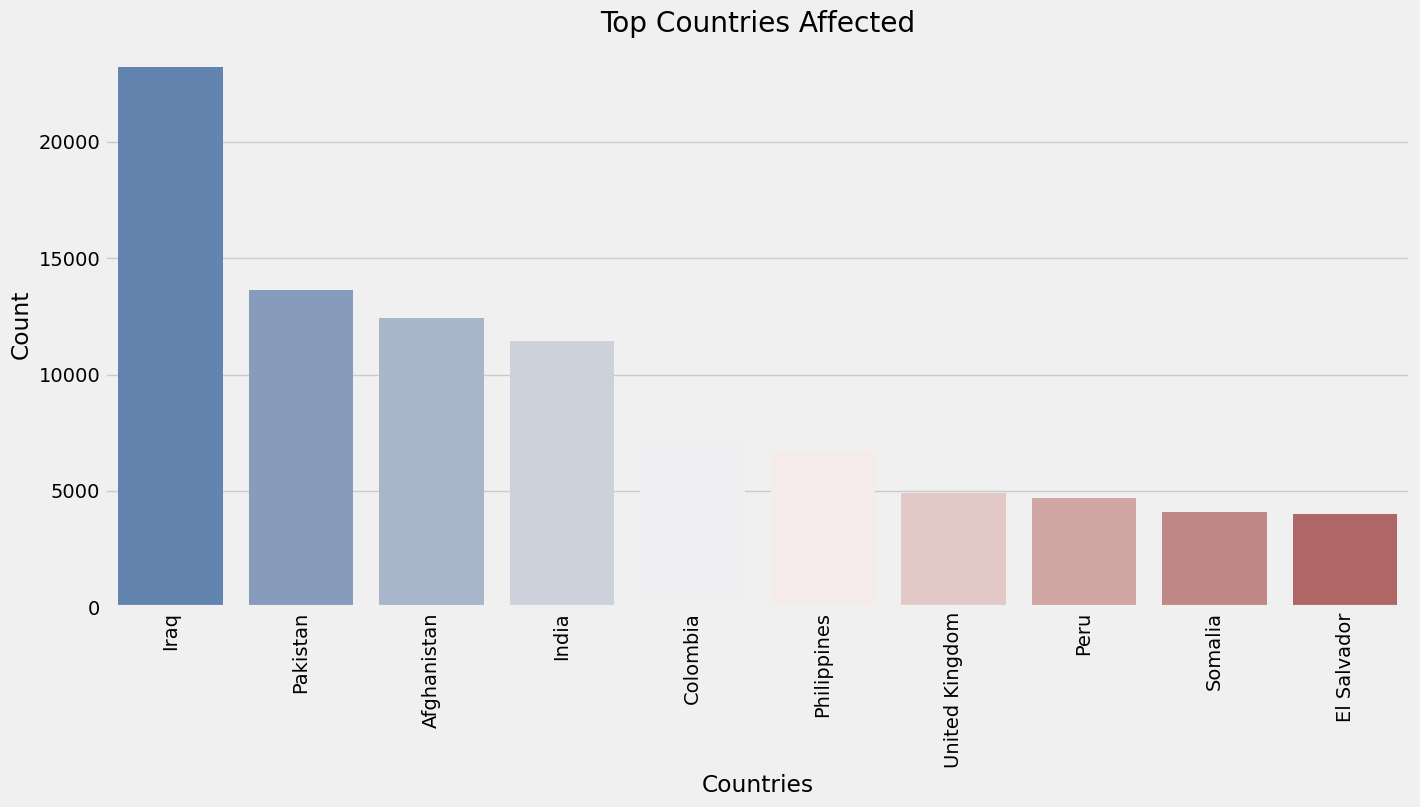

In [9]:
#Total number attacks in each country
plt.subplots(figsize=(15,7))
top_countries = data['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Count']
sns.barplot(x='Country', y='Count', data=top_countries, palette='vlag')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

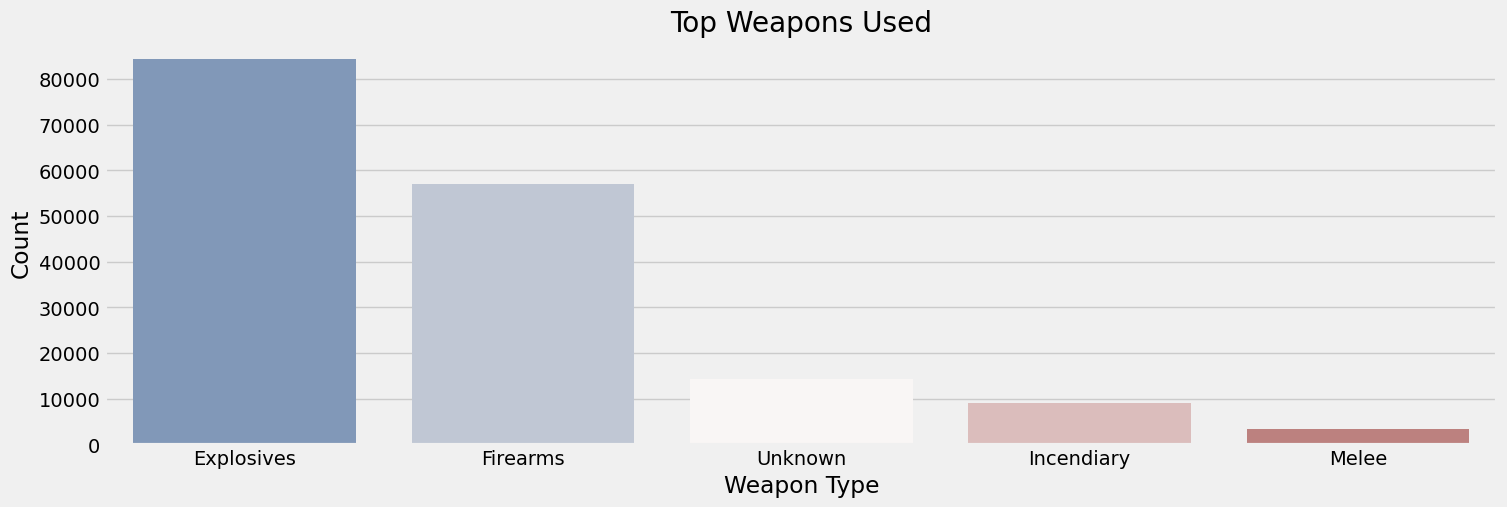

In [10]:
plt.subplots(figsize=(16,5))


top_Weapons = data['Weapon_type'].value_counts()[:5].to_frame().reset_index()
top_Weapons.columns = ['Weapon_type', 'Count']
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')



plt.title('Top Weapons Used')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

<AxesSubplot:ylabel='Weapon_type'>

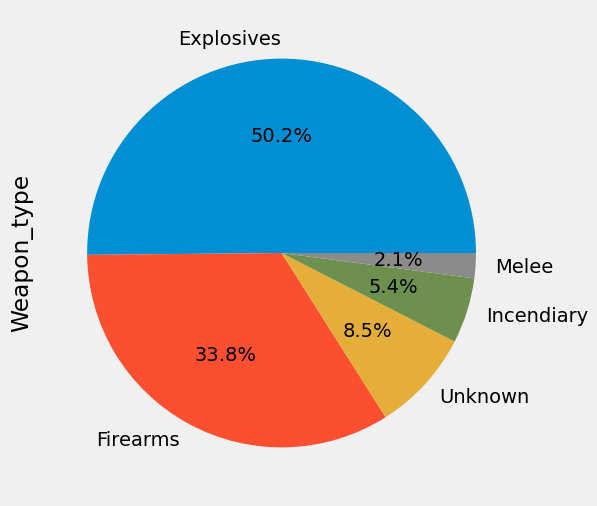

In [11]:
top5_Weapon=data['Weapon_type'].value_counts()[:5]
top5_Weapon.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))


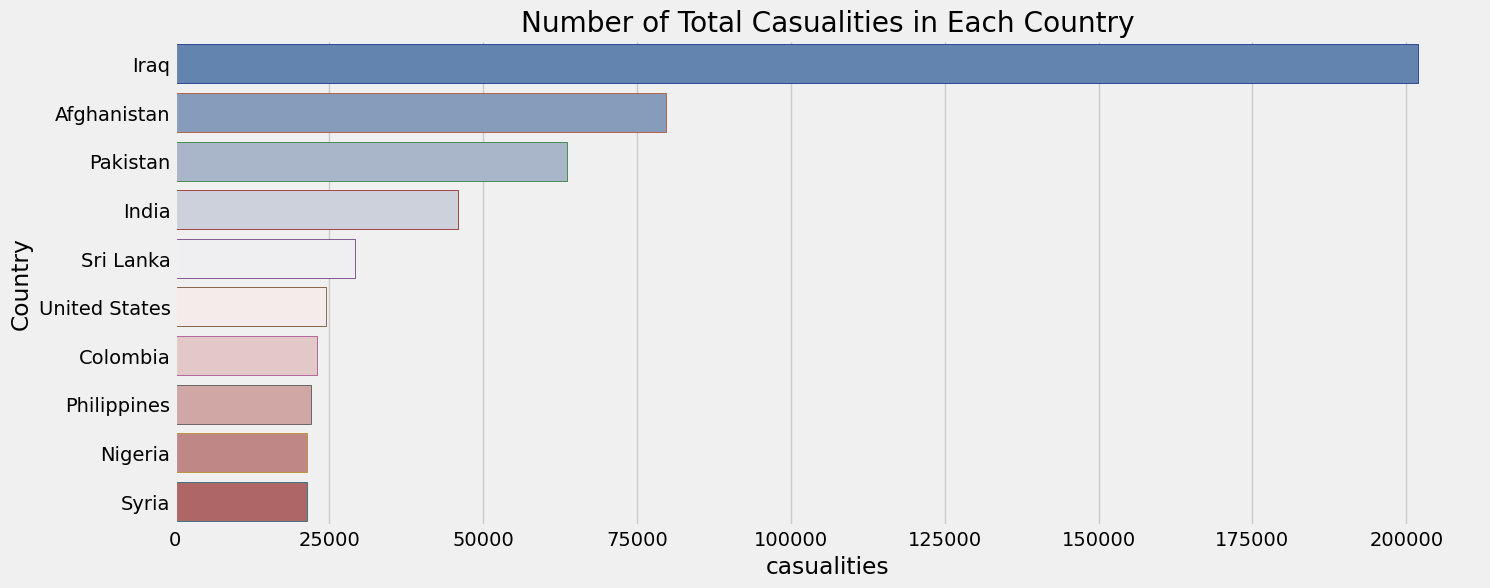

In [13]:
#Total no of casualties in each country 
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Country').casualities.sum().to_frame().reset_index().sort_values('casualities', ascending=False)[:10]
sns.barplot(x=count_cas.casualities, y=count_cas.Country, palette= 'vlag',edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Casualities in Each Country')
plt.show()

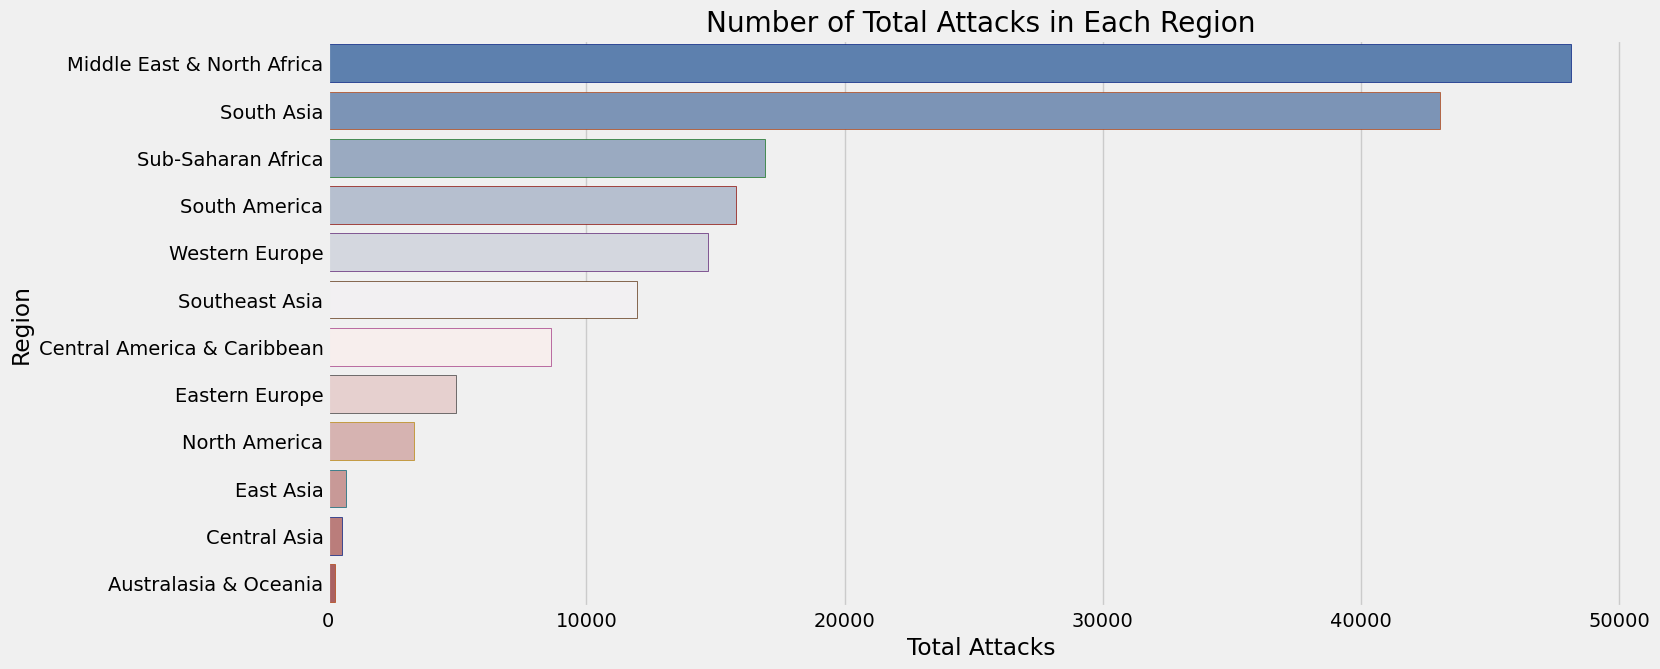

In [14]:
#Total no of attacks in each region
region_attacks =data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, palette='vlag', edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

<AxesSubplot:ylabel='Region'>

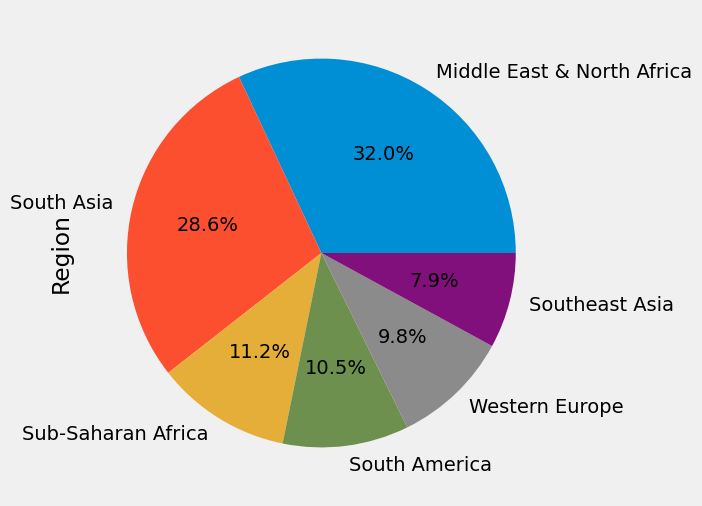

In [15]:
#Region wise terrorism activities
top5_Region=data['Region'].value_counts()[:6]
top5_Region.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

In [16]:
Mid_Nor=data[data.Region == "Middle East & North Africa"]
Mid_Nor.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,NaN
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,2.0,United Arab Airlines Flight Antonov 24 Acft,NaN,Unknown,Airports & Aircraft,Explosives,NaN,2.0
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,0.0,US Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0


In [17]:
Mid_Nor.count()

Year           48143
Month          48143
Day            48143
Country        48143
Region         48143
city           48113
latitude       47278
longitude      47278
AttackType     48143
Killed         45989
Wounded        44738
Target         48012
Summary        39823
Group          48143
Target_type    48143
Weapon_type    48143
Motive         15213
casualities    44577
dtype: int64

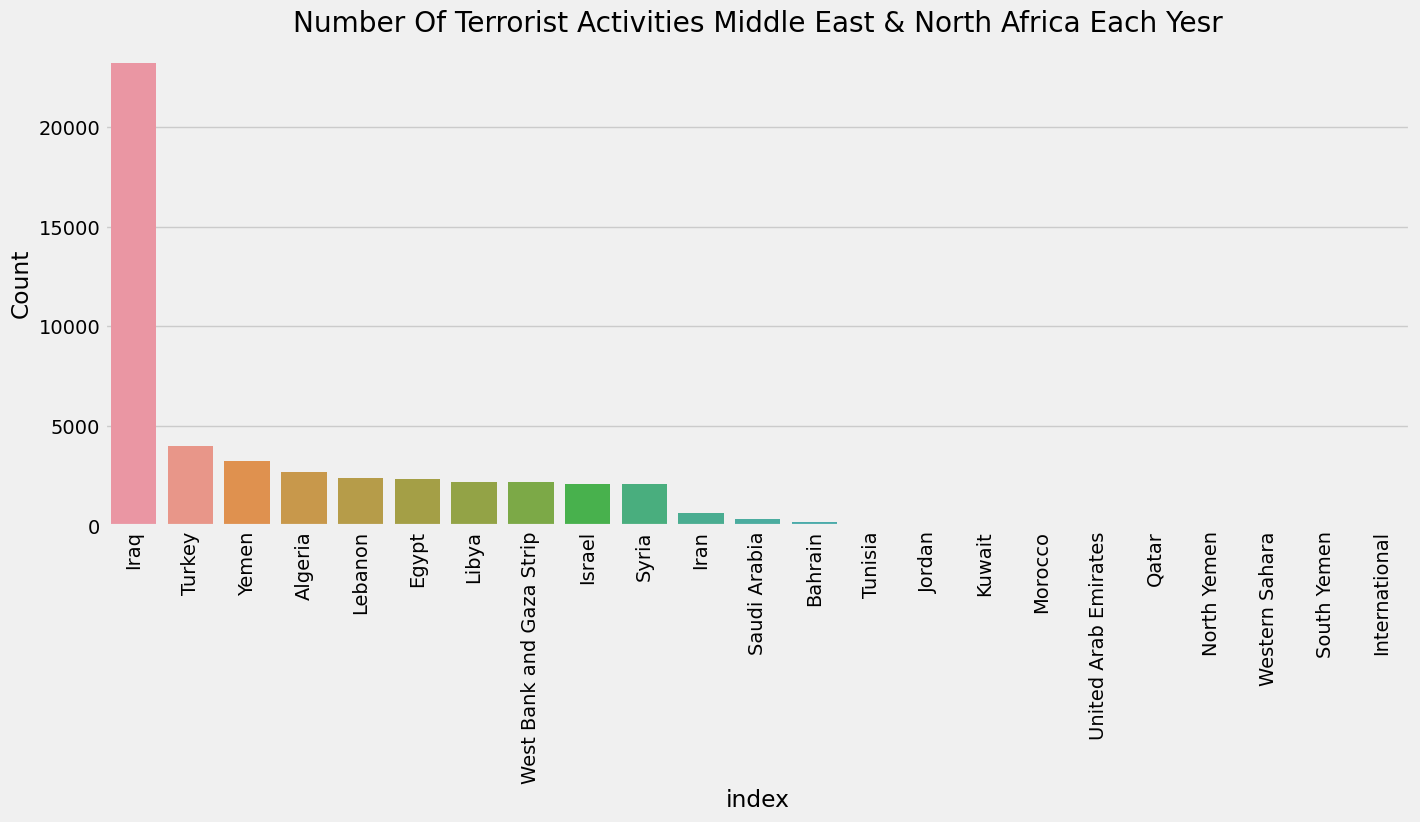

In [18]:
plt.subplots(figsize=(15,6))
data = Mid_Nor['Country'].value_counts().reset_index(name='Count')
sns.barplot(x='index', y='Count', data=data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Yesr')
plt.show()

In [19]:
data.count()

index    23
Count    23
dtype: int64

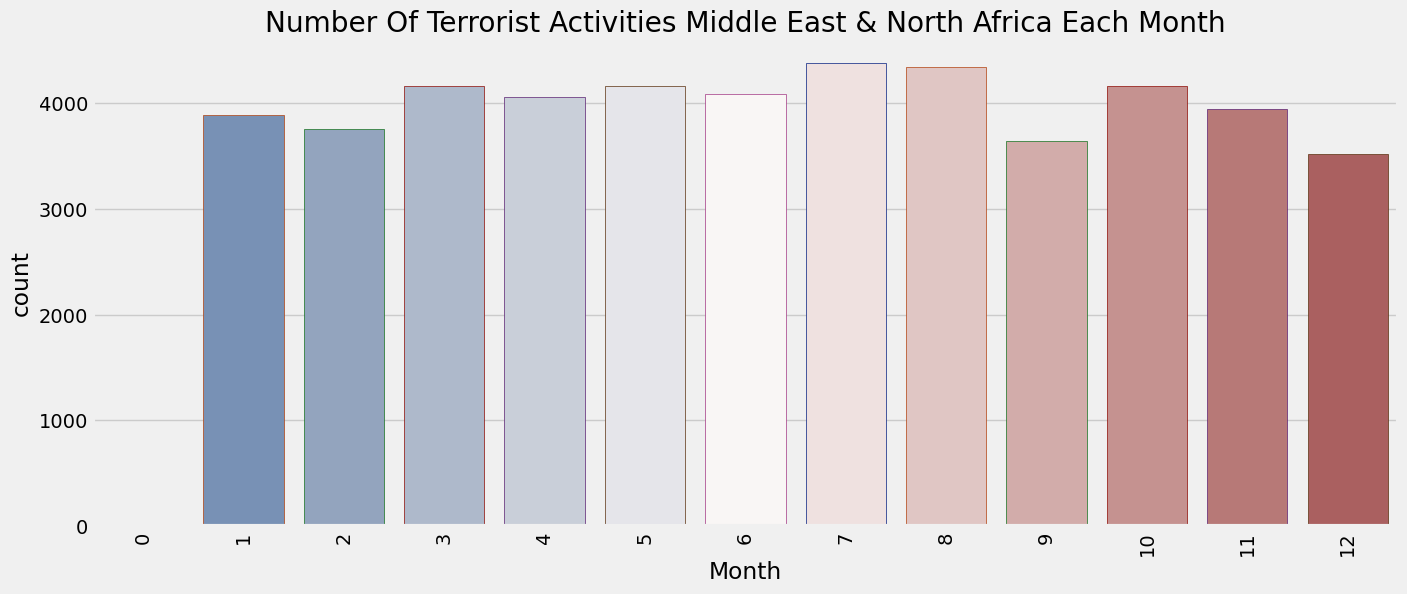

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Month',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Month')
plt.show()

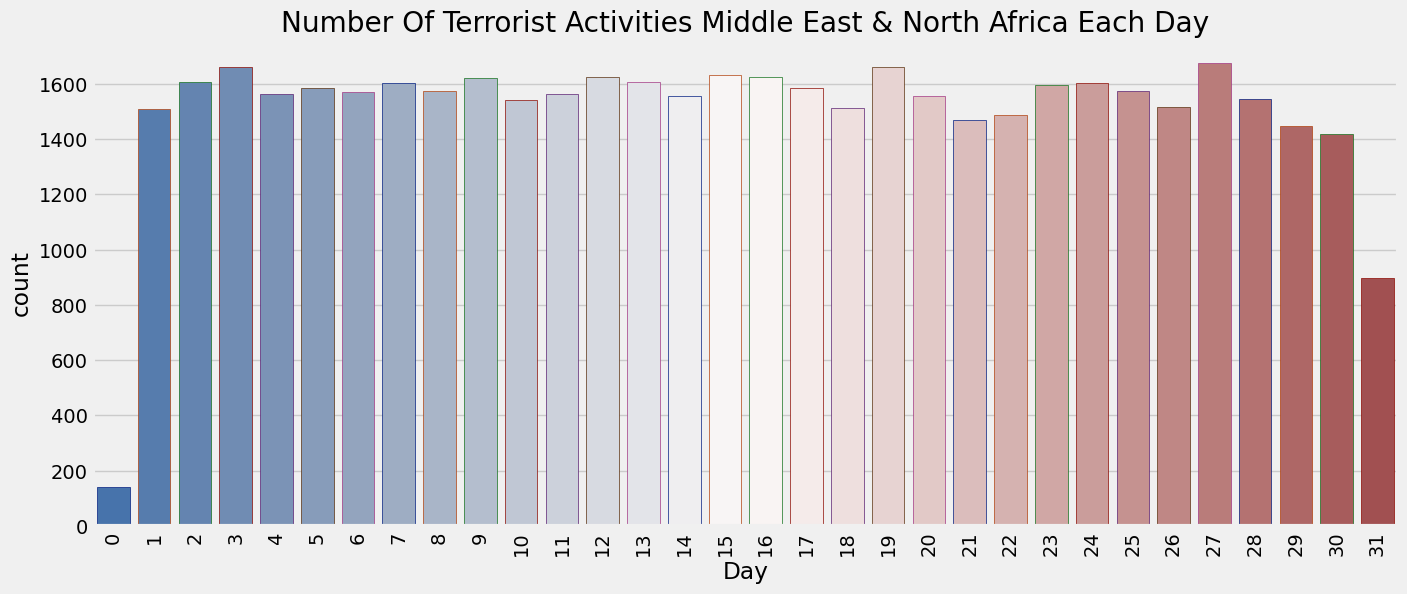

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Day',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Day')
plt.show()

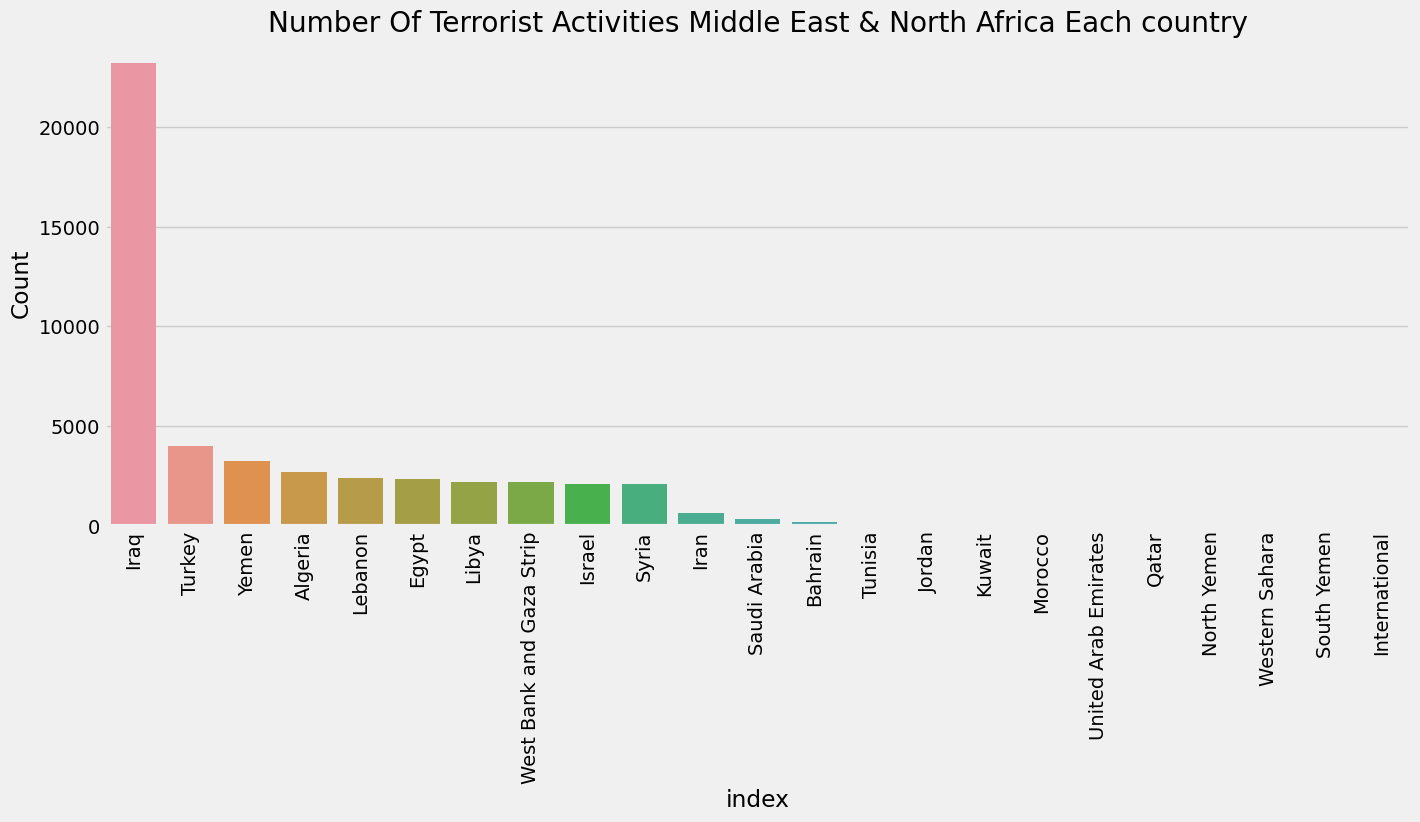

In [22]:
plt.subplots(figsize=(15,6))
data = Mid_Nor['Country'].value_counts().reset_index(name='Count')
sns.barplot(x='index', y='Count', data=data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each country')
plt.show()

<AxesSubplot:ylabel='Country'>

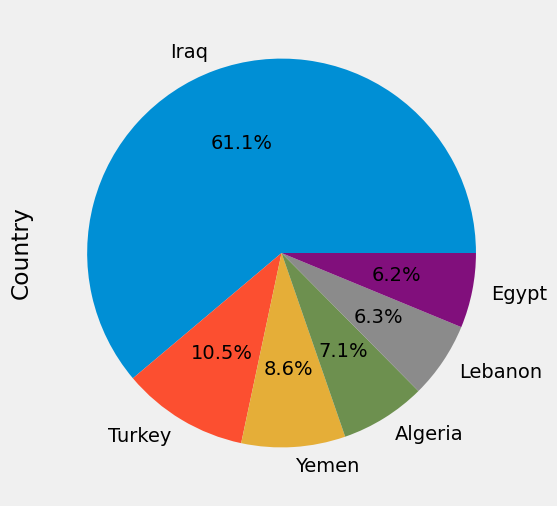

In [23]:
top5_country=Mid_Nor['Country'].value_counts()[:6]
top5_country.dropna()
top5_country.plot(kind='pie',autopct="%1.1f%%",figsize=(6,6))

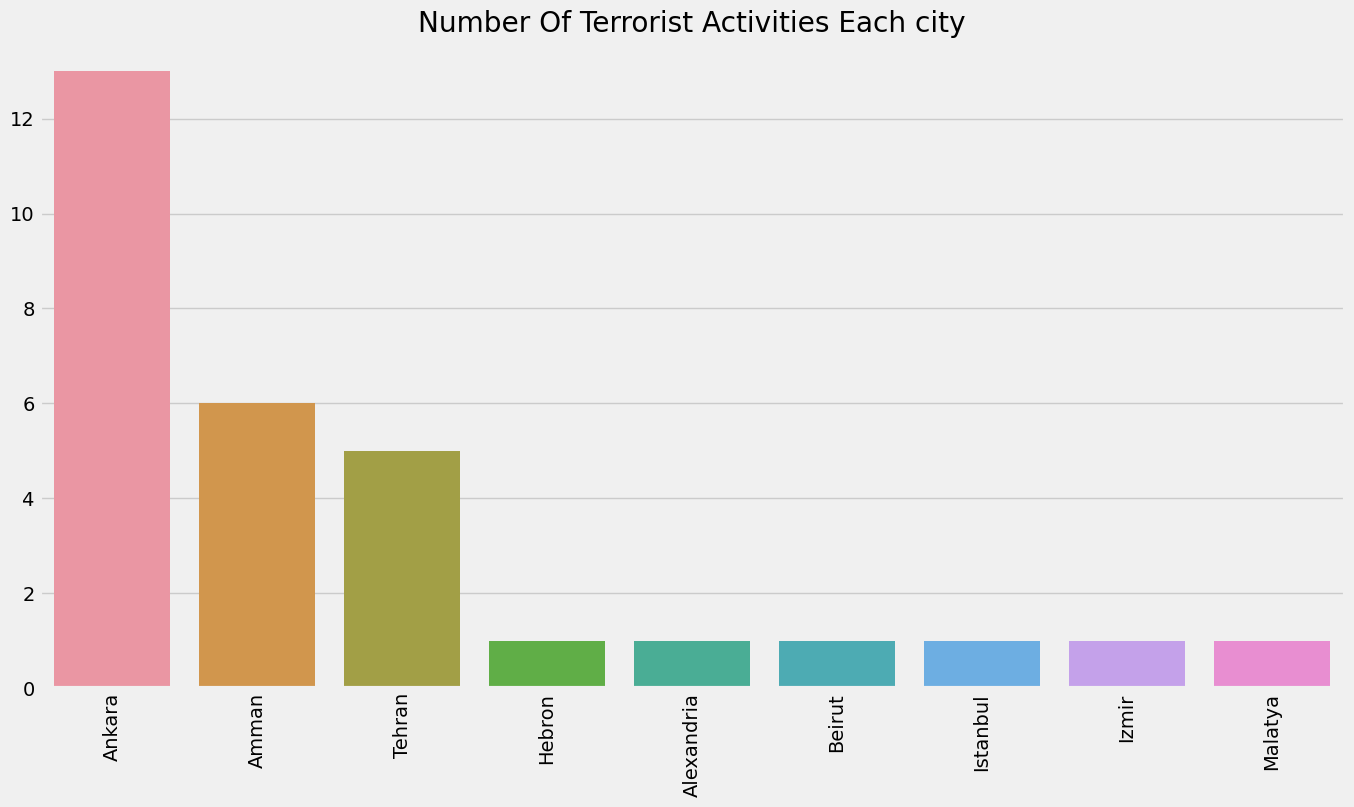

In [24]:
top_30_city=Mid_Nor.head(30)
plt.subplots(figsize=(15,8))
sns.barplot(x=top_30_city['city'].value_counts().index, y=top_30_city['city'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each city')
plt.show()

<AxesSubplot:ylabel='city'>

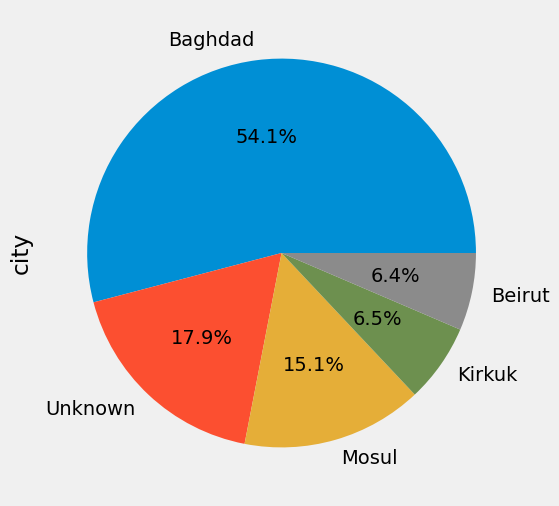

In [25]:
top5_country=Mid_Nor['city'].value_counts()[:5]
top5_country.dropna()
top5_country.plot(kind='pie',autopct="%1.1f%%",figsize=(6,6))

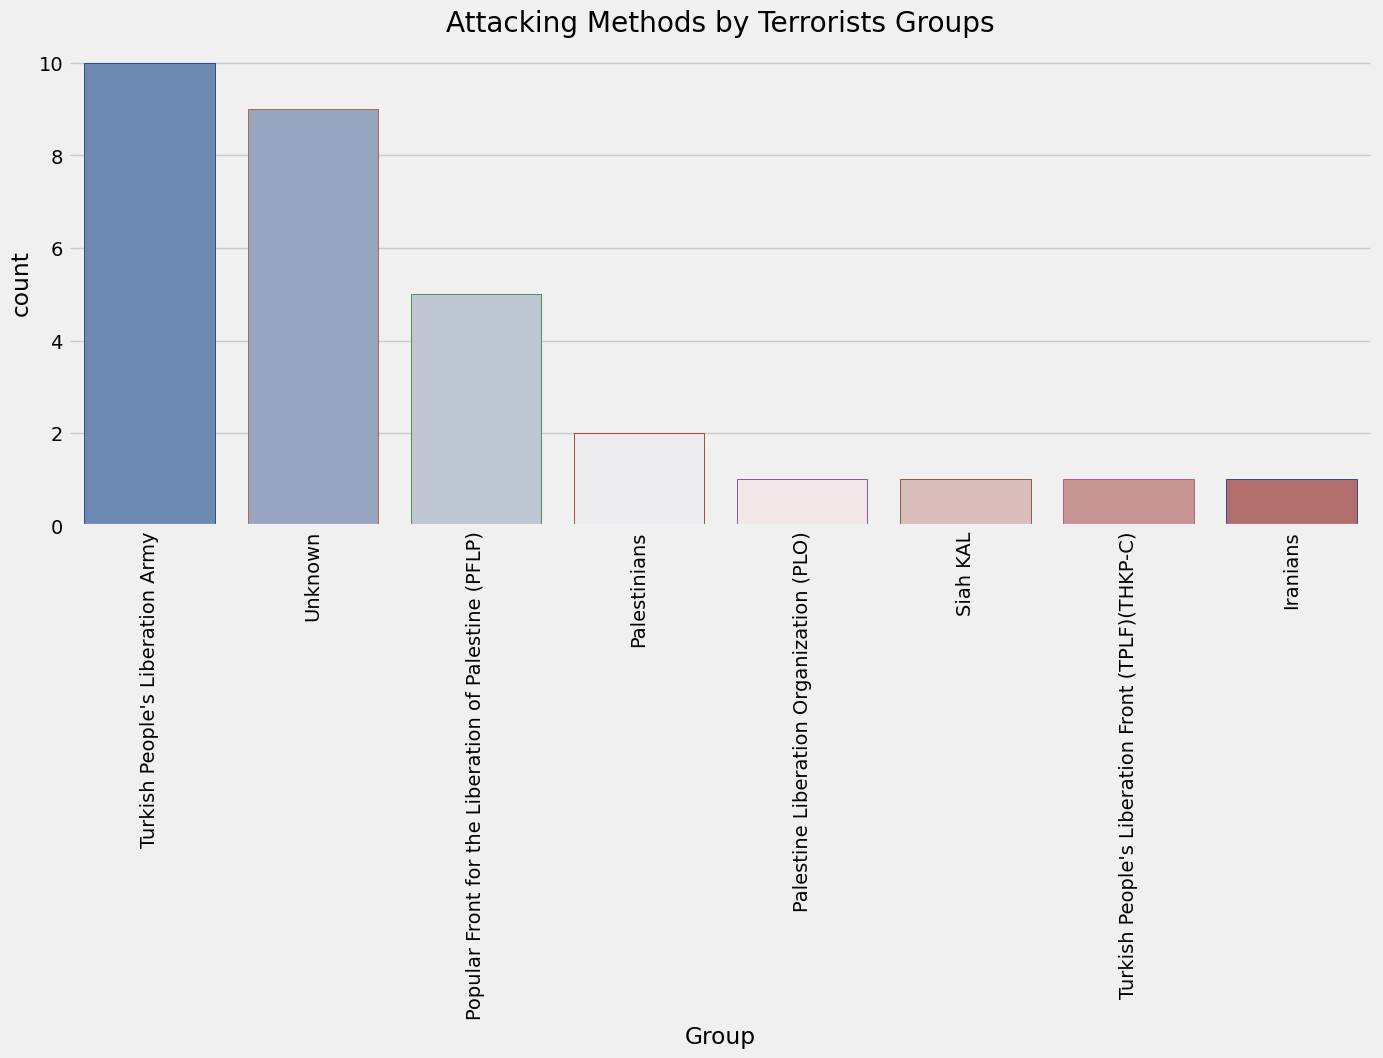

In [26]:
top_30_Group=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='Group', data=top_30_Group, palette='vlag', order=top_30_Group.Group.value_counts().index, edgecolor=sns.color_palette('dark', 7))

plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists Groups')
plt.show()

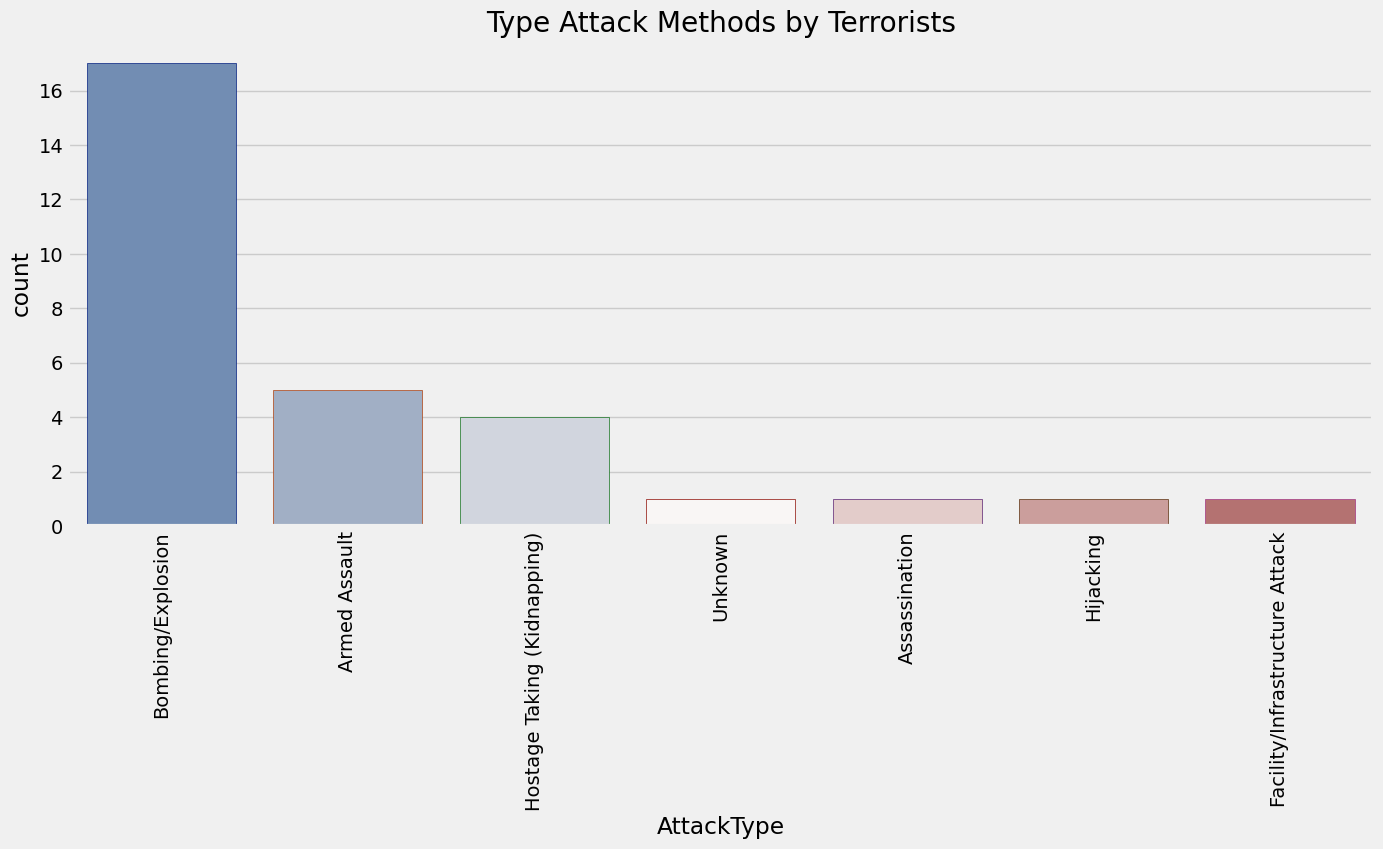

In [27]:
top_30_Att=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x = 'AttackType',data=top_30_Att,palette='vlag',order=top_30_Att.AttackType.value_counts().index,edgecolor=sns.color_palette('dark',7))

plt.xticks(rotation=90)
plt.title('Type Attack Methods by Terrorists')
plt.show()

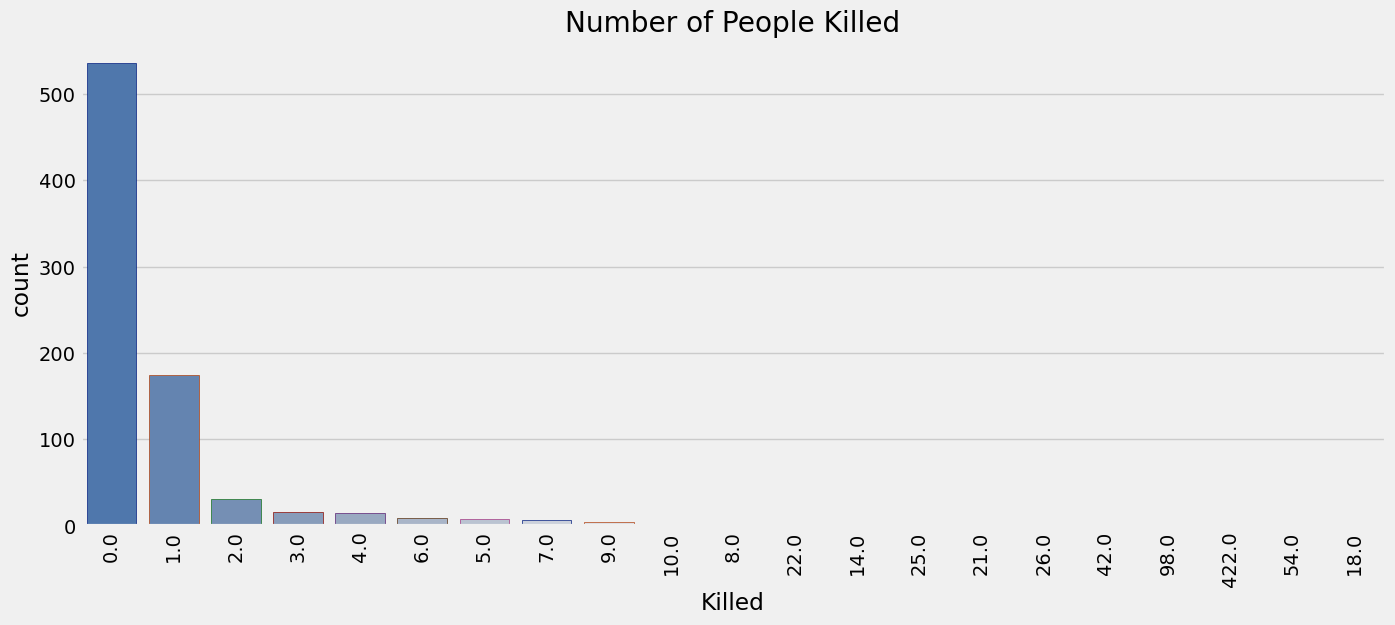

In [28]:
top_30_kill=Mid_Nor.head(1000)
plt.subplots(figsize=(15,6))
sns.countplot(x='Killed',data=top_30_kill,palette='vlag',order=top_30_kill.Killed.value_counts().index,edgecolor=sns.color_palette('dark',7))

plt.xticks(rotation=90)
plt.title('Number of People Killed')
plt.show()

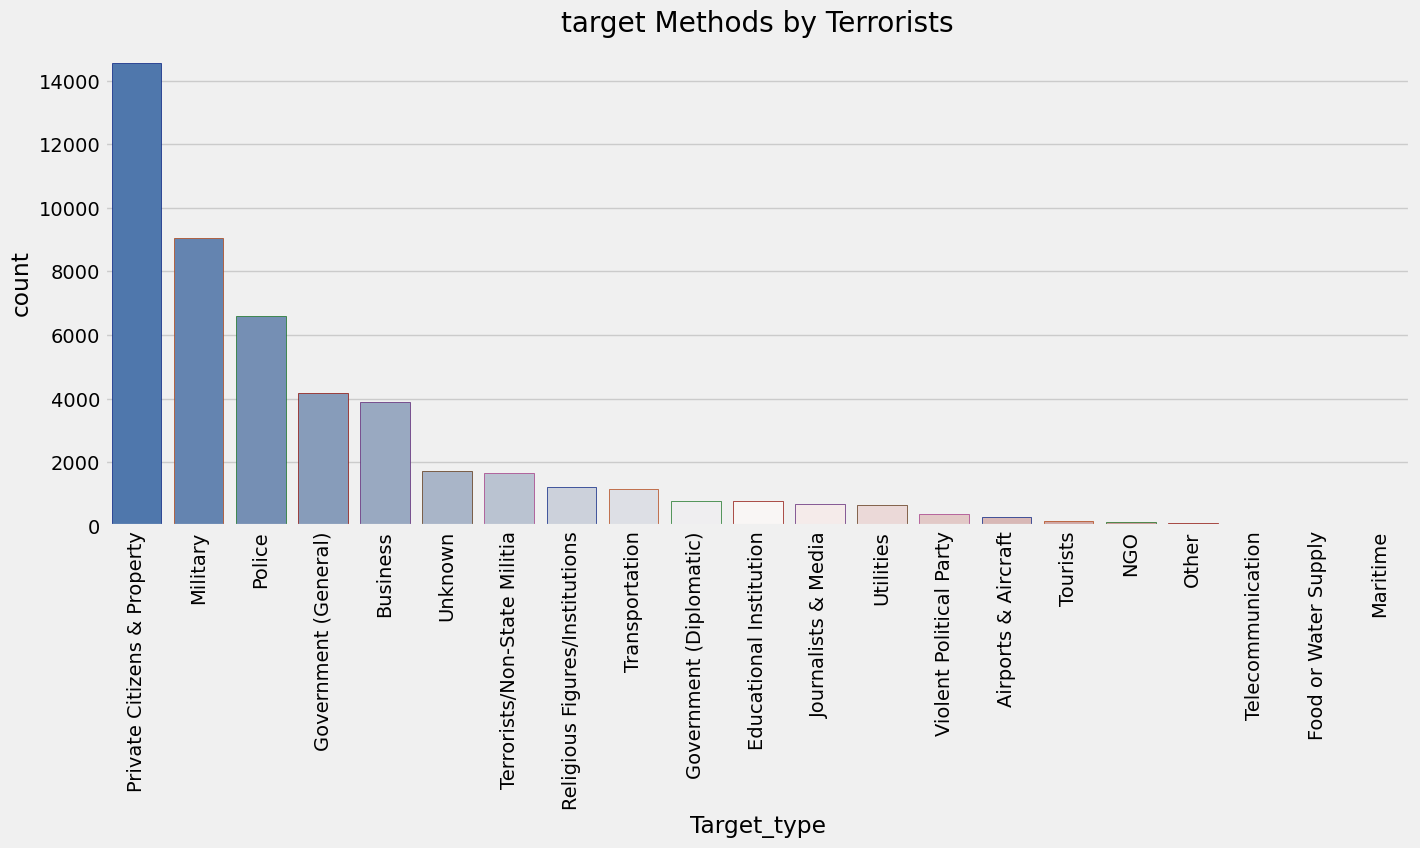

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Target_type.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('target Methods by Terrorists')
plt.show()

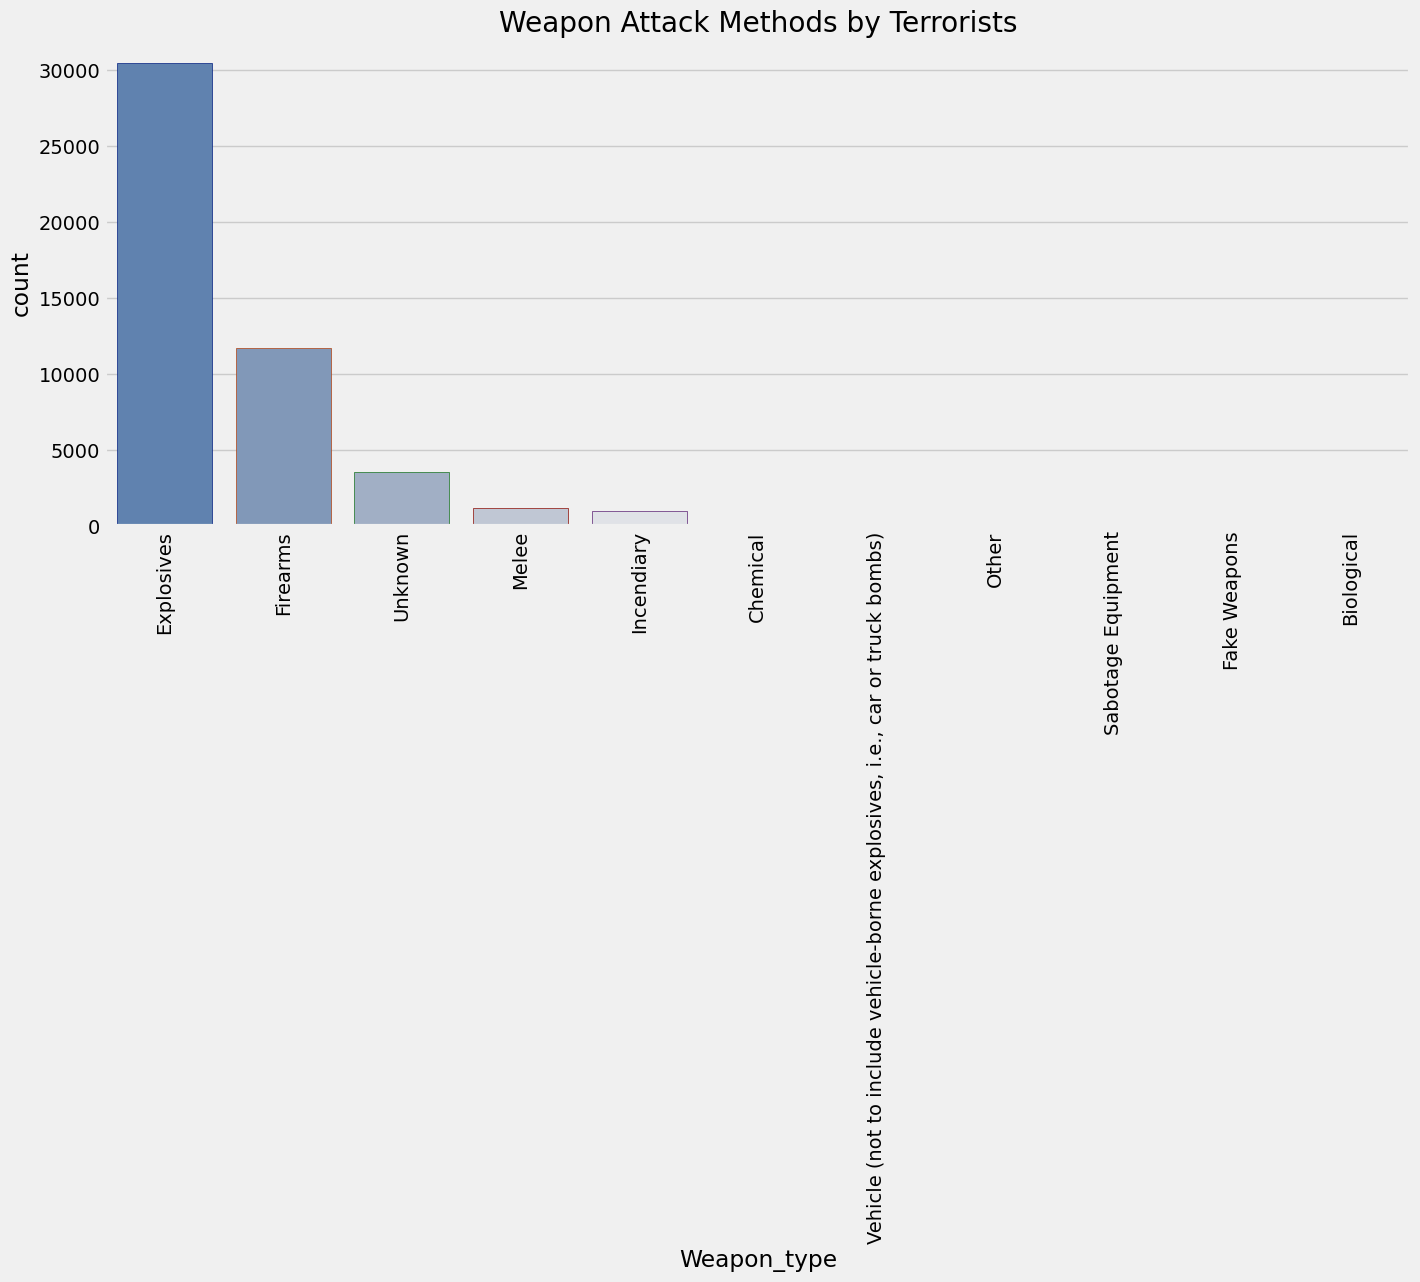

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Weapon_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Weapon_type.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Weapon Attack Methods by Terrorists')
plt.show()

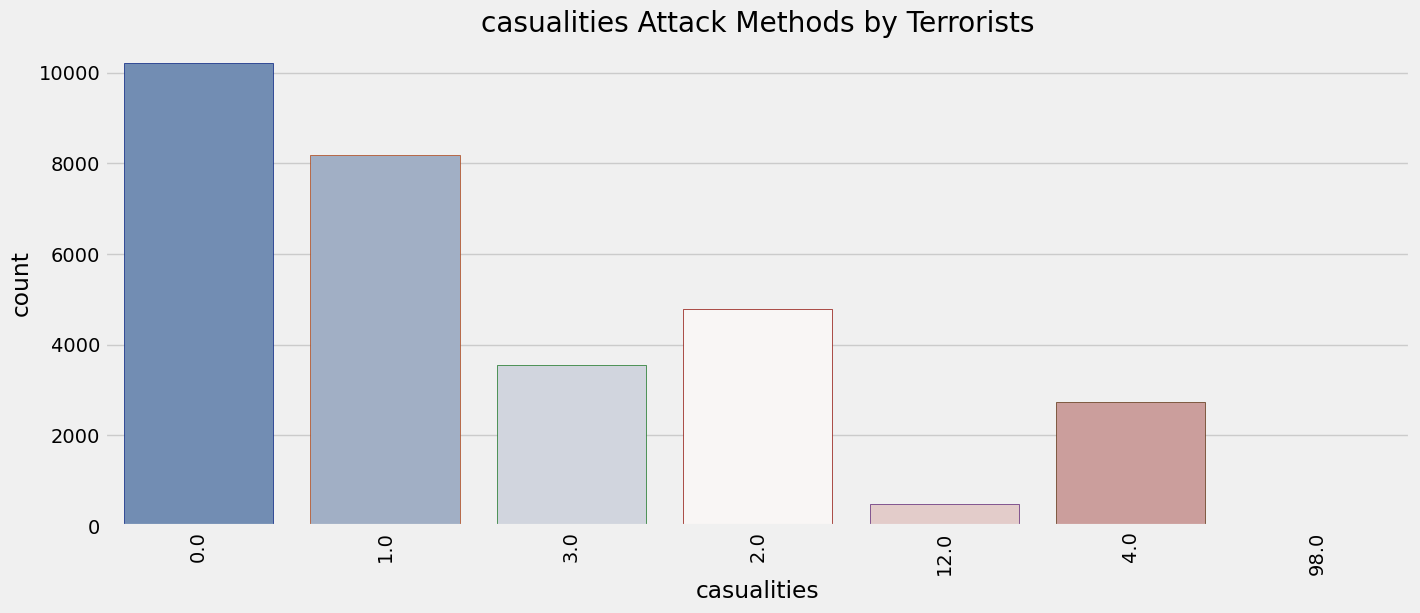

In [31]:
top_100_casu=Mid_Nor.head(100)
plt.subplots(figsize=(15,6))
sns.countplot(x='casualities',data=Mid_Nor,palette='vlag',order=top_100_casu.casualities.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('casualities Attack Methods by Terrorists')
plt.show()

In [32]:
number_of_affected = Mid_Nor[['Country','Killed','Wounded','casualities']]
number_of_affected = number_of_affected.groupby(by=['Country']).sum().reset_index().sort_values(by=['casualities'], ascending = False)
number_of_affected.head(10)

,Country,Killed,Wounded,casualities
5,Iraq,78138.0,133976.0,201915.0
16,Syria,14885.0,13925.0,21334.0
0,Algeria,10887.0,8994.0,18961.0
18,Turkey,6870.0,9876.0,16653.0
22,Yemen,8609.0,9038.0,15857.0
9,Lebanon,4029.0,10876.0,14705.0
6,Israel,1703.0,7914.0,9394.0
2,Egypt,3800.0,4761.0,8525.0
4,Iran,1673.0,4029.0,5623.0
10,Libya,2592.0,3310.0,5501.0


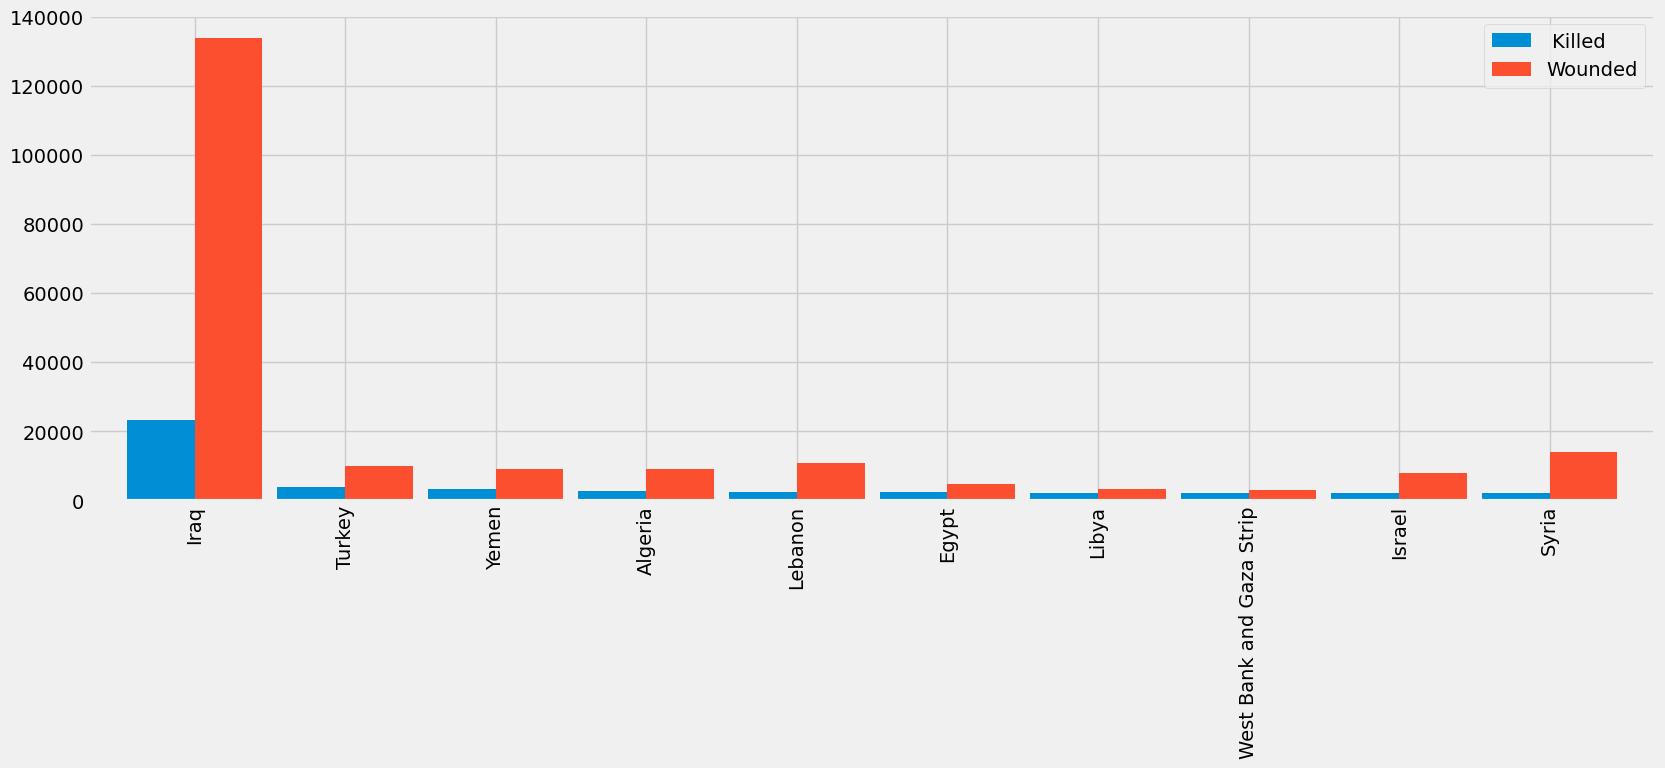

In [33]:
count_terror=Mid_Nor['Country'].value_counts()[:10].to_frame()
count_terror.columns=[' Killed ']
count_kill=Mid_Nor.groupby('Country')['Wounded'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

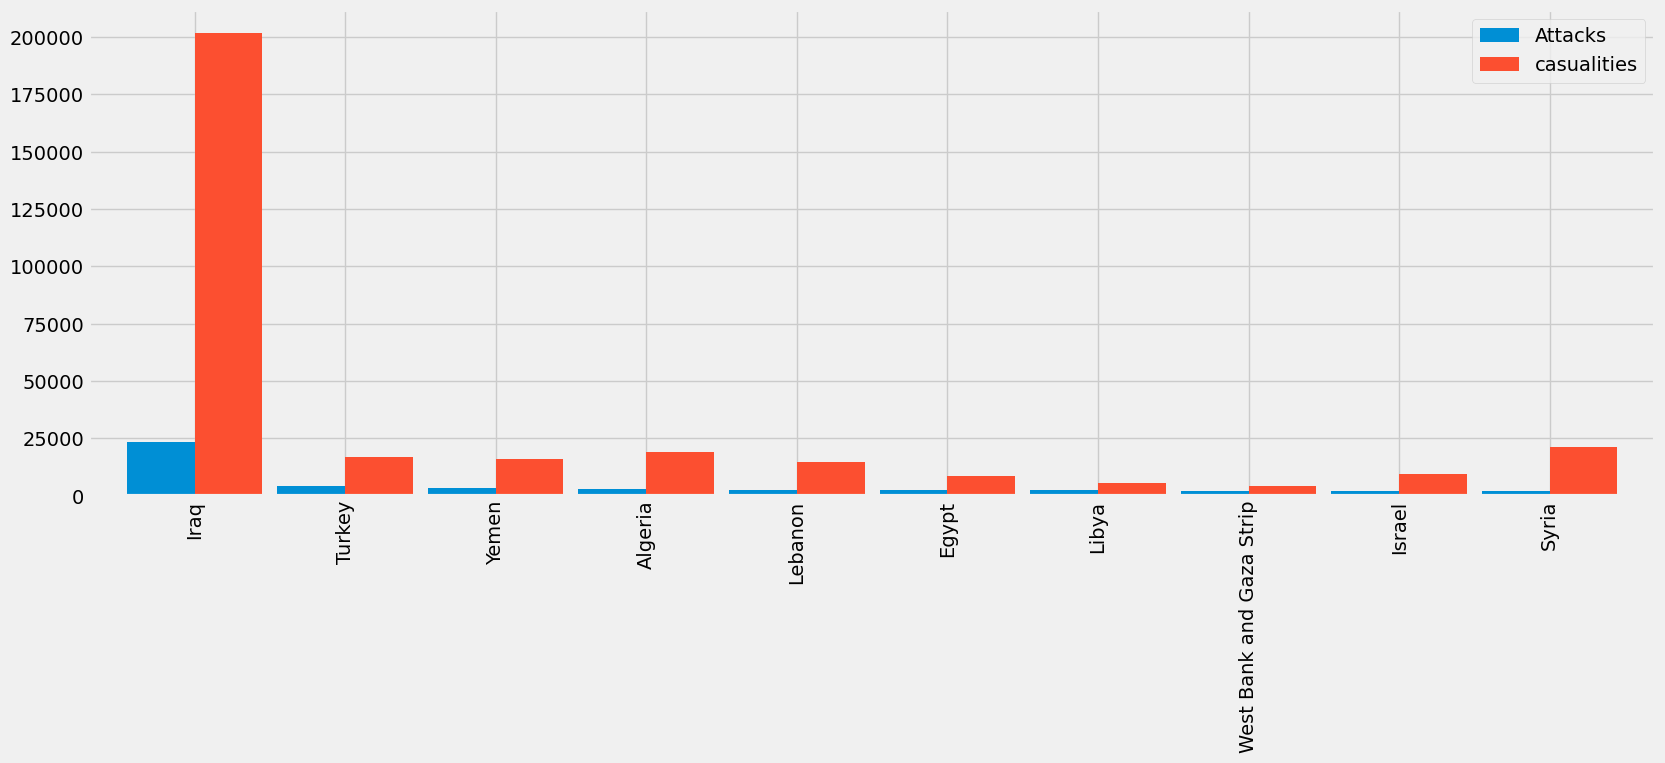

In [34]:
count_terror=Mid_Nor['Country'].value_counts()[:10].to_frame()
count_terror.columns=['Attacks']
count_kill=Mid_Nor.groupby('Country')['casualities'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

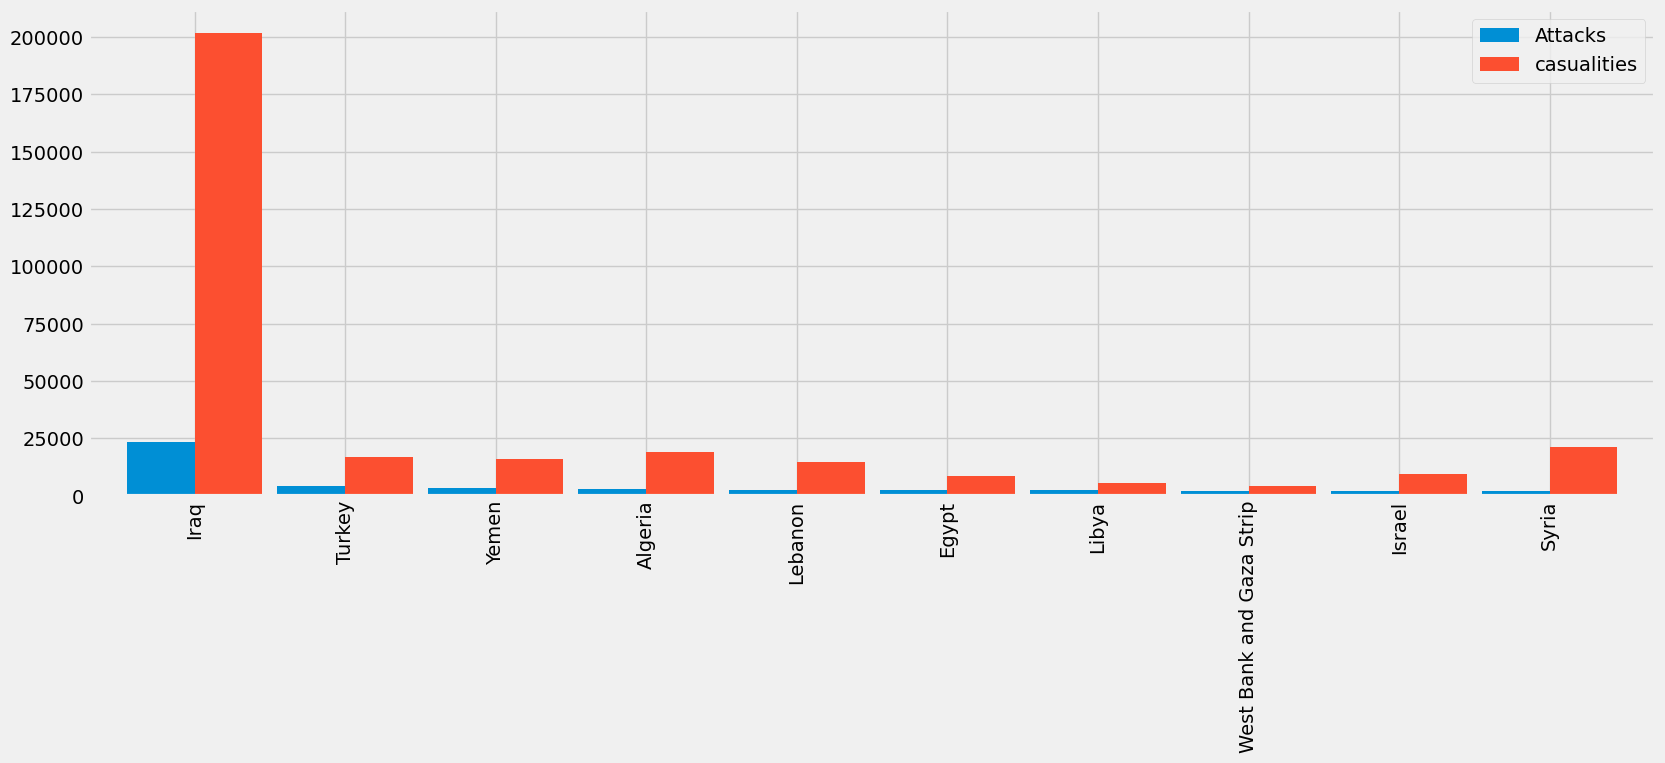

In [35]:
count_terror=Mid_Nor['Country'].value_counts()[:10].to_frame()
count_terror.columns=['Attacks']
count_kill=Mid_Nor.groupby('Country')['casualities'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [36]:
group_killed= Mid_Nor[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Unknown to Muslim extremists
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Killed  15 non-null     float64
dtypes: float64(1)
memory usage: 240.0+ bytes


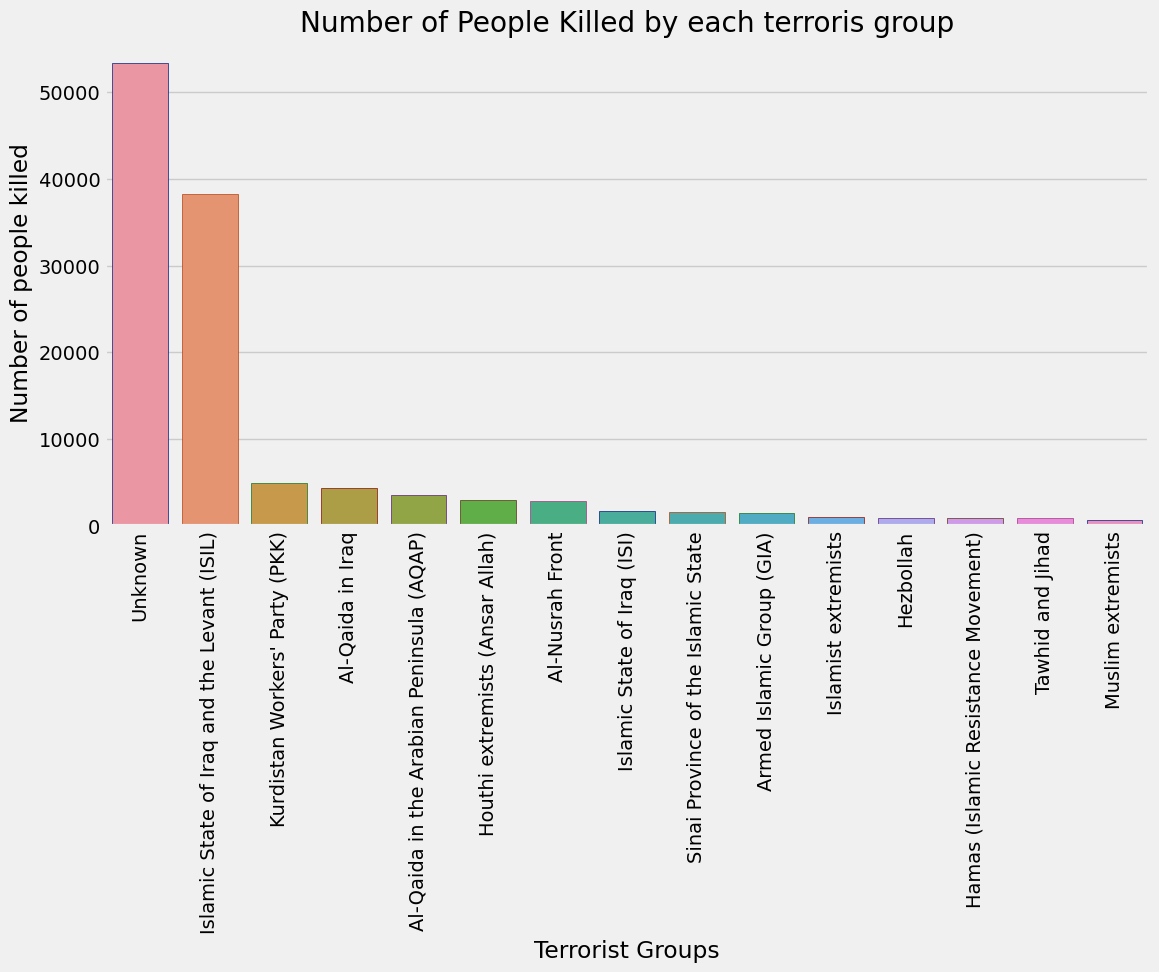

In [37]:
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index, y=group_killed.Killed, edgecolor=sns.color_palette('dark',7))
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

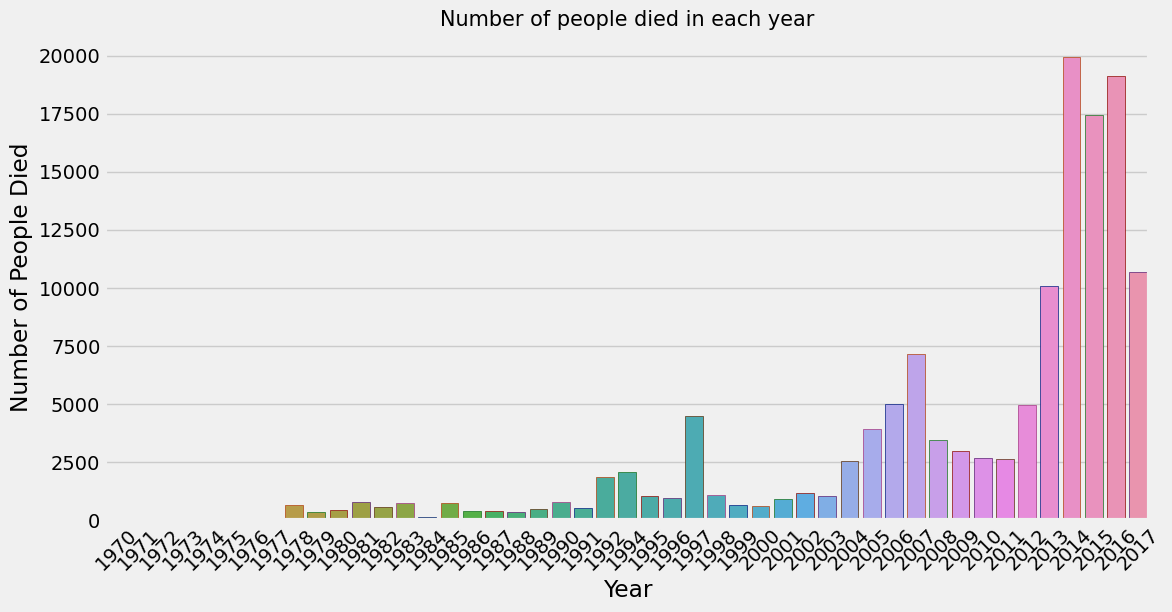

In [38]:
died_people = Mid_Nor[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(x=died_people.index, y=died_people.Killed.values,edgecolor=sns.color_palette('dark',7))

plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

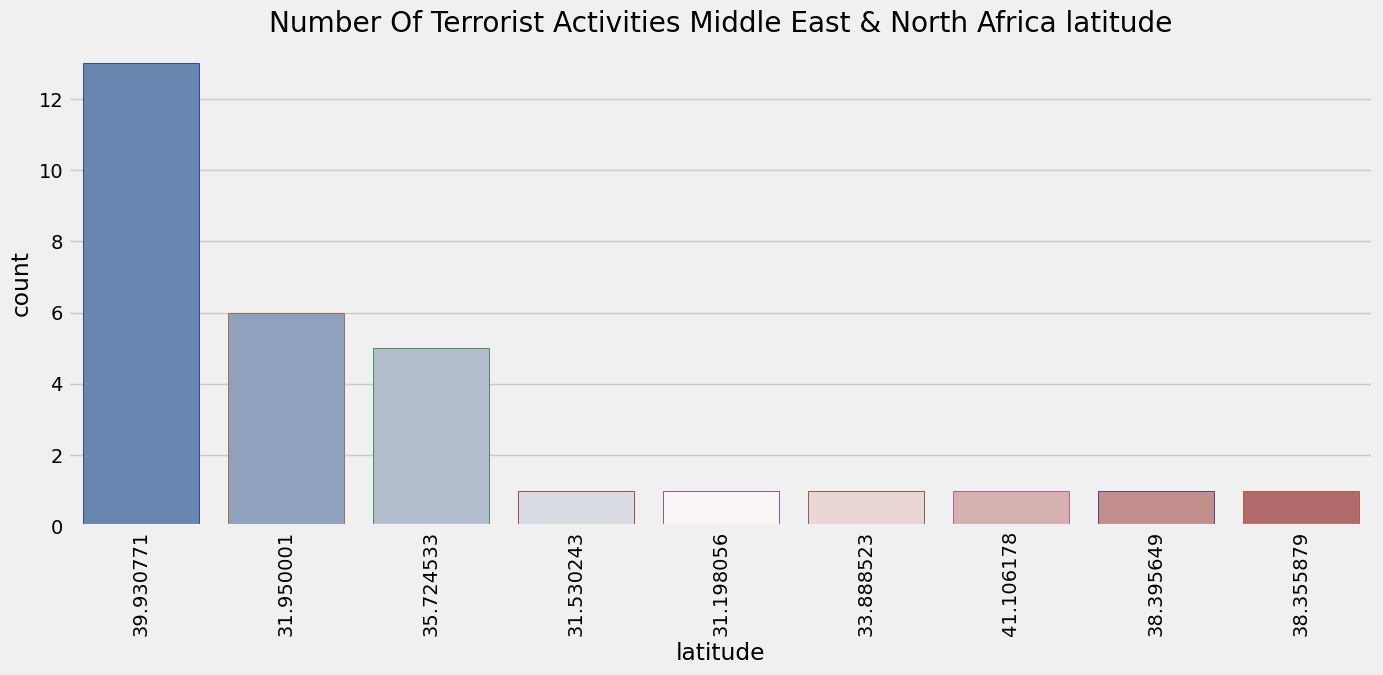

In [39]:
top_30_lat=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='latitude',data=top_30_lat,palette='vlag',order=top_30_lat.latitude.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa latitude')
plt.show()

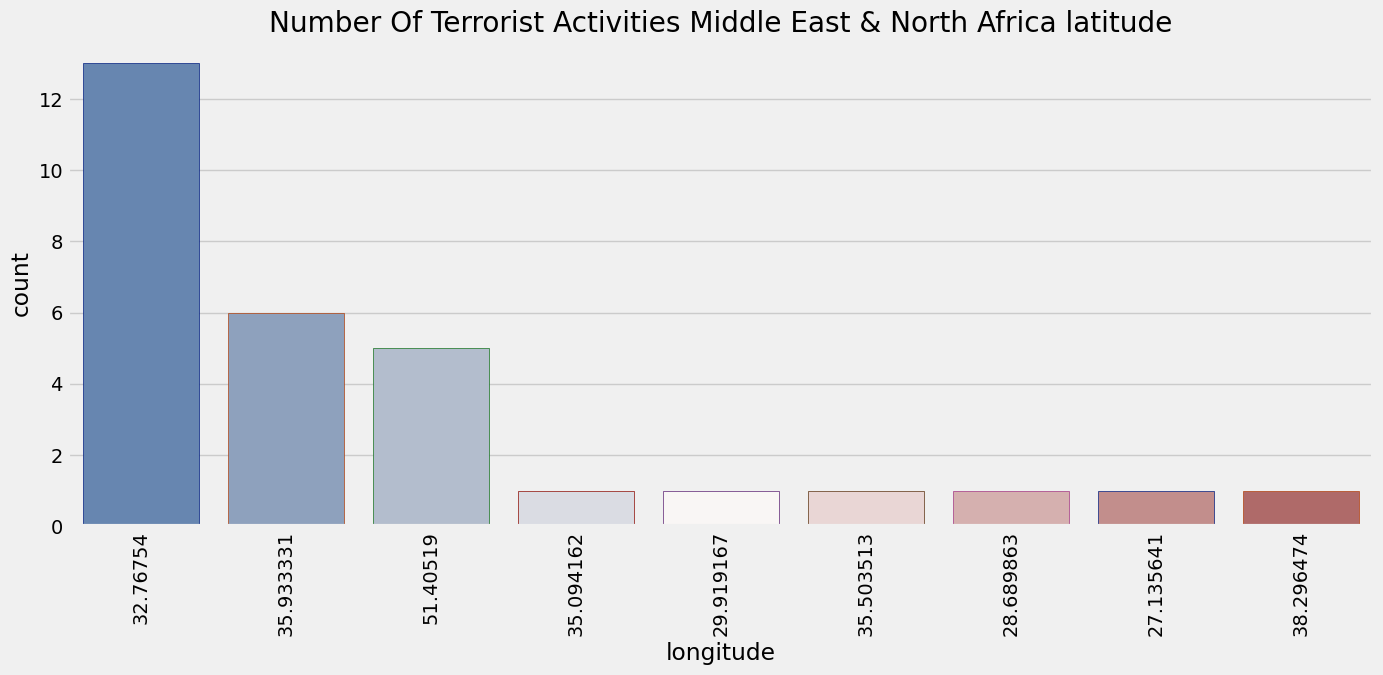

In [40]:
top_30_longitude=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='longitude',data=top_30_longitude,palette='vlag',order=top_30_longitude.longitude.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa latitude')
plt.show()

In [41]:
Mid_Nor.Summary.value_counts().sort_values(ascending=False).head(10)

10/09/2012: Assailants threw incendiary devices and rocks at a school in Idil city, Sirnak province, Turkey. This was one of eight coordinated attacks carried out simultaneously in the area on this date. Two individuals were injured across all eight events. No group claimed responsibility for the incident; however, authorities suspected the Kurdistan Workers' Party (PKK).                                                                                                                    7
06/13/2007: A total of four Iraqi civilians were killed and six others were wounded in a series of four attacks on Sunni mosques in Basra, Basra Governorate, Iraq.  No claim of responsibility was reported.                                                                                                                                                                                                                                                                                             4
11/10/2012: Pale

In [42]:
Mid_Nor.Motive.value_counts().sort_values(ascending=False).head(20)

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             5016
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                                                                                                                 